Grading for pre-lecture questions is all or nothing. Partial credit is available for in-class assignments and checkpoints. Partial credit will primarily be determined by the quality of the comments you make in your code. Tell me what you intend the code to do. If there are no comments, there is no partial credit!

In [ ]:
NAME = ""
COLLABORATORS = ""

---

# Learning Objectives

This lecture will show you how to:
1. Calculate a derivative numerically
2. Visualize vector fields with Matplotlib
3. Calculate a gradient with NumPy
4. Apply a linear least squares fit
5. Identify if your data follows a power law

In [ ]:
# imports
import numpy as np
import matplotlib.pyplot as plt

import grading_helper as _test

# Numerical Differentiation

In [ ]:
%video ksh3Ukbv7hw

Summary:

- There are a few ways to calculate a numerical derivative, but the best accuracy comes from the **central difference** formula:
$$\frac{df}{dx}=\lim_{h\to0} \frac{f(x+h/2)-f(x-h/2)}{h}\,.$$
- The ideal $h\sim10^{-5}$ with error $\epsilon \sim 10^{-10}$. (Although these values depend on the precision used for floating point numbers, and can vary by OS and Python version.)
- Use `numpy.gradient(array, spacing)` for a fast implementation of the central difference method. It also works with 2-D+ arrays.

## Your Turn

Use the central difference method to create a function `dfdx(x)` that calculates the derivative of $f(x)=\ln(x)$ at $x$. Calculate an analytic formula for the derivative and make a graph with your numerical result and the analytic answer on the same plot for the range $0<x<1$. Plot the exact answer as a line and the numerical one as dots. The graphs should line up well.

You are not permitted to use `np.gradient` for this problem.

In [ ]:
%%graded # 1 point

# YOUR CODE HERE

In [ ]:
%%tests

_test.code_contains("np.log") # ln is called log
_test.code_contains("gradient", forbidden=True)
_test.similar(dfdx(0.1), 10)
_test.similar(dfdx(0.2), 5)
_test.similar(dfdx(0.5), 2)
_test.plot_shown()

# Visualizing Vector Fields

In [ ]:
%video u0hfen9VkJs

Summary:

- To plot vector field $\vec{F}$ with components $F_x$ and $F_y$ use
        plt.quiver(x, y, fx, fy)
- For nicer formatting, use
        Q = plt.quiver(x, y, fx, fy, pivot="middle")
        plt.quiverkey(Q, x, y, length, label, labelpos="E")
- To plot stream lines (sort of like field lines) use
        plt.streamplot(x, y, fx, fy, density)

## Your Turn

Use `gradient` and `quiver` to plot the gradient of $\cos(xy)$. Pick sensible limits for $x$ and $y$. Use a contour plot to "check" your answer&mdash;the gradient should be perpendicular to the contours. Your graph should look something like this:

<img width=500 src="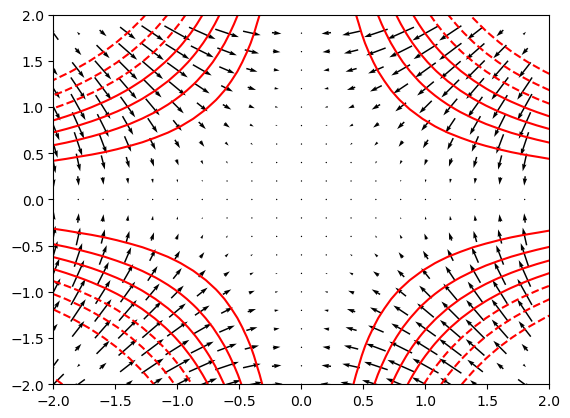
">

In [ ]:
%%graded # 2 points

# YOUR CODE HERE

In [ ]:
%%tests

_test.code_contains("gradient", "contour", "meshgrid", "quiver")
_test.plot_shown()

# Linear Least Squares Fit

In [ ]:
%video J1kowoPGQyI

Summary:

- The goal is to minimize
$$\chi^2 = \sum_{i=1}^N\Bigg(\frac{y_i - f(x_i)}{\sigma_i}\Bigg)^2\,,$$
where $(x_i, y_i)$ are our data points, and $f(x_i)$ is the function we want to fit.
- We substitute in our fitting function and minimize by setting the partial derivatives w.r.t to the fit parameters equal to zero. That gives us one equation per parameter, which we can then solve.
- Any fitting function that is linear in its parameters can be optimized analytically. `np.polyfit(x, y, degree)` does this for us for any polynomial.

# Fitting a Power Law

In [ ]:
%video yjeMEuK6hik

Summary:

- Many phenomena are well described by functions of the form
$$f(x) = ax^b\,,$$
where $a$ and $b$ are parameters we'd like to fit. While this function isn't linear as written, we can make it linear by taking the logarithm of both sides:
$$\ln f = ln(a) + b\ln(x)\,.$$
Note that this is the equation of a line with slope $b$ and y-intercept $\ln(a)$. (This trick works with logarithms of any base.)
- We can check by eye to see if our data follows a power law by plotting it using axes with logarithmic scaling. Look for a straight line.
- Use this trick with `np.polyfit(lnx, lny, 1)` to fit a power law to your data. (Just be careful about transforming the parameters back - you get $\ln a$ and $b$ from the fit.)

## Your Turn

Fit a power law of the form $f(x) = ax^b$ to the data below and find the values of $a$ and $b$. Store the result in variables named `a` and `b`.

In [ ]:
x = np.logspace(0, 3, 50)
err = 0.01*x*np.random.randn(50)
y = 6*(x + err)**2 # y is a noisy function of x

In [ ]:
%%graded # 2 points

# YOUR CODE HERE

In [ ]:
%%tests

_test.code_contains("polyfit", "log", "exp")
_test.similar(a, 6) # These are the values I original used before adding some noise
_test.similar(b, 2) #

# Additional Resources

- Textbook section 5.10